In [7]:


# To begin, import the following: pandas, seaborn, regex,and matplotlib
# To ignore warnings, use the following code to make the display more attractive.
import pandas as pd
import numpy as np
import plotly as py
import re
import csv
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

#To import the college salary dataset:
pollution = pd.read_csv("pollution.csv")


#To view income data:
pollution.head()



,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [8]:
#view the number of observations (rows and columns)
pollution.shape


(1746661, 29)

In [9]:
#check the type of data we have
type(pollution)

pandas.core.frame.DataFrame

In [10]:
#To check for any missing values
pollution.isnull().any()

Unnamed: 0           False
State Code           False
County Code          False
Site Num             False
Address              False
State                False
County               False
City                 False
Date Local           False
NO2 Units            False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Units             False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Units            False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI               True
CO Units             False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI                True
dtype: bool

In [11]:
#Some values are missing
#drop the values columns that have missing data 
pollution.dropna(inplace=True)
pollution.reset_index(inplace=True, drop=True)
pollution.isnull().any()

Unnamed: 0           False
State Code           False
County Code          False
Site Num             False
Address              False
State                False
County               False
City                 False
Date Local           False
NO2 Units            False
NO2 Mean             False
NO2 1st Max Value    False
NO2 1st Max Hour     False
NO2 AQI              False
O3 Units             False
O3 Mean              False
O3 1st Max Value     False
O3 1st Max Hour      False
O3 AQI               False
SO2 Units            False
SO2 Mean             False
SO2 1st Max Value    False
SO2 1st Max Hour     False
SO2 AQI              False
CO Units             False
CO Mean              False
CO 1st Max Value     False
CO 1st Max Hour      False
CO AQI               False
dtype: bool

In [12]:
#To view the number of monitoring sites by state:
pollution["State"].value_counts()



California              144109
Pennsylvania             47278
Texas                    30807
New York                 17624
Arizona                  17469
Illinois                 12536
North Carolina            9282
Virginia                  9107
Arkansas                  8832
Colorado                  8801
Oklahoma                  8615
Kansas                    7871
Connecticut               7483
New Jersey                6683
Florida                   6479
Iowa                      6464
District Of Columbia      6431
Louisiana                 5969
Maine                     5906
Maryland                  5888
Ohio                      5734
Massachusetts             5394
Hawaii                    5080
Missouri                  4947
Kentucky                  3676
Indiana                   3481
Wyoming                   3261
Oregon                    2949
North Dakota              2755
Nevada                    2423
Country Of Mexico         2383
New Hampshire             2323
Utah    

In [13]:
#drop unwanted column
data=pollution.drop(['State Code', 'County Code','Site Num','Address','County','City','NO2 Units','NO2 1st Max Value','NO2 1st Max Hour','O3 Units','O3 1st Max Value','O3 1st Max Value','SO2 Units','SO2 1st Max Value','SO2 1st Max Hour','CO Units','CO 1st Max Value','CO 1st Max Hour','Unnamed: 0'], axis=1)



In [14]:
#Now we have the data we want to start graphing
data.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,0.878947,25.0
1,Arizona,2000-01-02,22.958333,34,0.013375,10,27,1.958333,4.0,1.066667,26.0
2,Arizona,2000-01-03,38.125000,48,0.007958,9,14,5.250000,16.0,1.762500,28.0
3,Arizona,2000-01-04,40.260870,72,0.014167,9,28,7.083333,23.0,1.829167,34.0
4,Arizona,2000-01-05,48.450000,58,0.006667,9,10,8.708333,21.0,2.700000,42.0


In [15]:
#Look at the shape (rows and columns) of data, again
data.shape

(436876, 11)

In [16]:
#View the last rows of data
data.tail()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
436871,Wyoming,2016-03-27,4.277273,22,0.041958,10,46,-0.095238,0.0,0.100000,1.0
436872,Wyoming,2016-03-28,8.317391,21,0.041292,9,48,0.117391,0.0,0.100000,1.0
436873,Wyoming,2016-03-29,2.564706,3,0.028000,23,37,0.143750,0.0,0.006667,1.0
436874,Wyoming,2016-03-30,1.083333,1,0.043917,18,44,0.016667,0.0,0.091667,1.0
436875,Wyoming,2016-03-31,0.939130,1,0.045263,9,44,-0.022727,0.0,0.100000,1.0


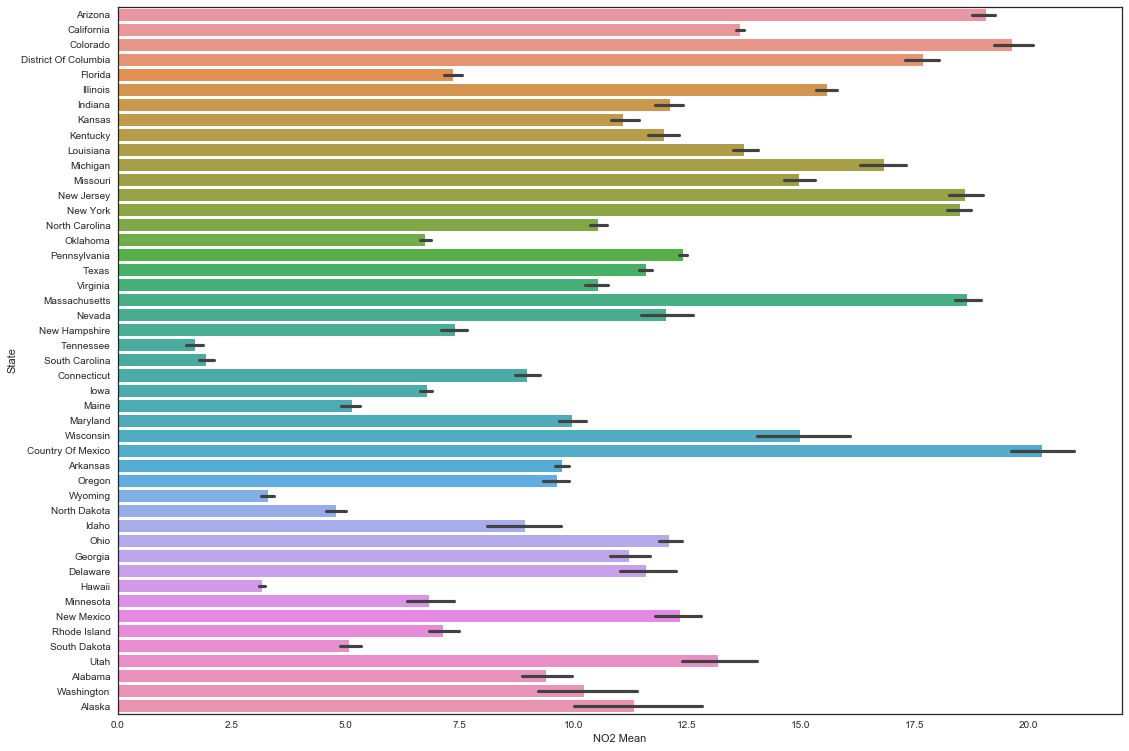

In [17]:
#Now we are ready to create some data visualizations
#This seaborn barplot shows the mean NO2 levels for each state
ax = sns.barplot(x="NO2 Mean",y="State", data=data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)
plt.show()


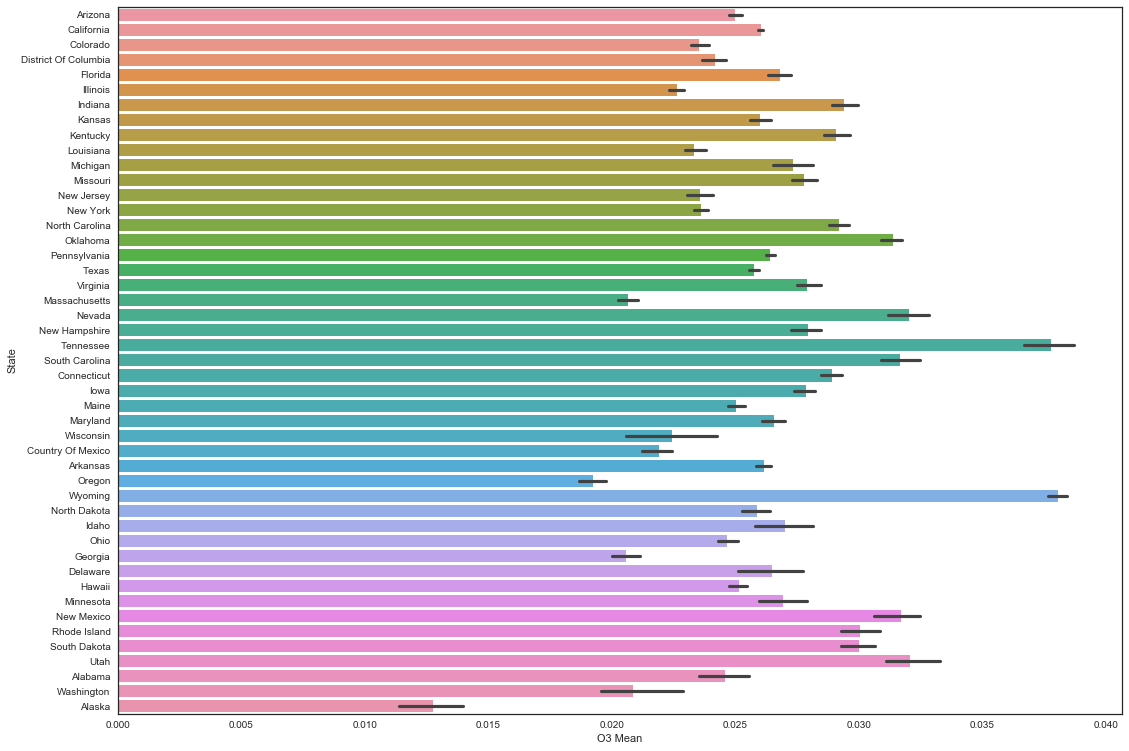

In [18]:
#Repeat this step for the O3 Mean
ax = sns.barplot(x="O3 Mean",y="State", data=data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)
plt.show()

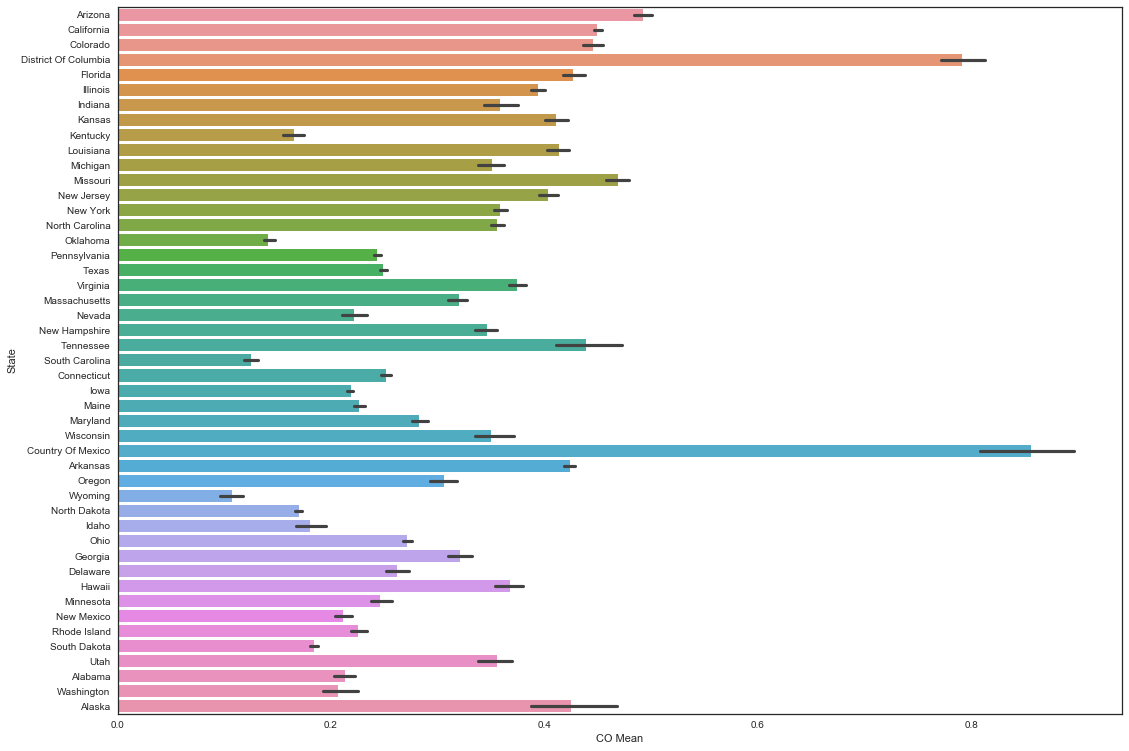

In [19]:
#Again for Carbon Monoxide (CO) Mean
ax = sns.barplot(x="CO Mean",y="State", data=data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)
plt.show()

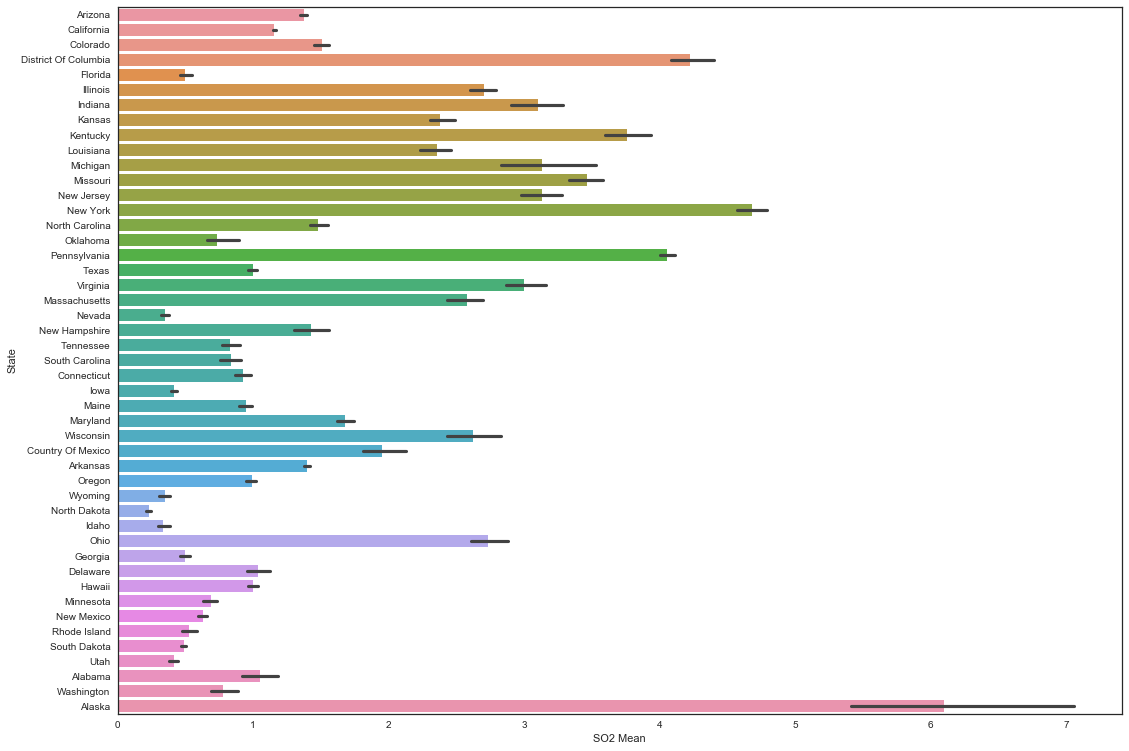

In [20]:
#Now we will plot the SO2 Mean with the same graph to show differences in pollutant levels
ax = sns.barplot(x="SO2 Mean",y="State", data=data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)
plt.show()

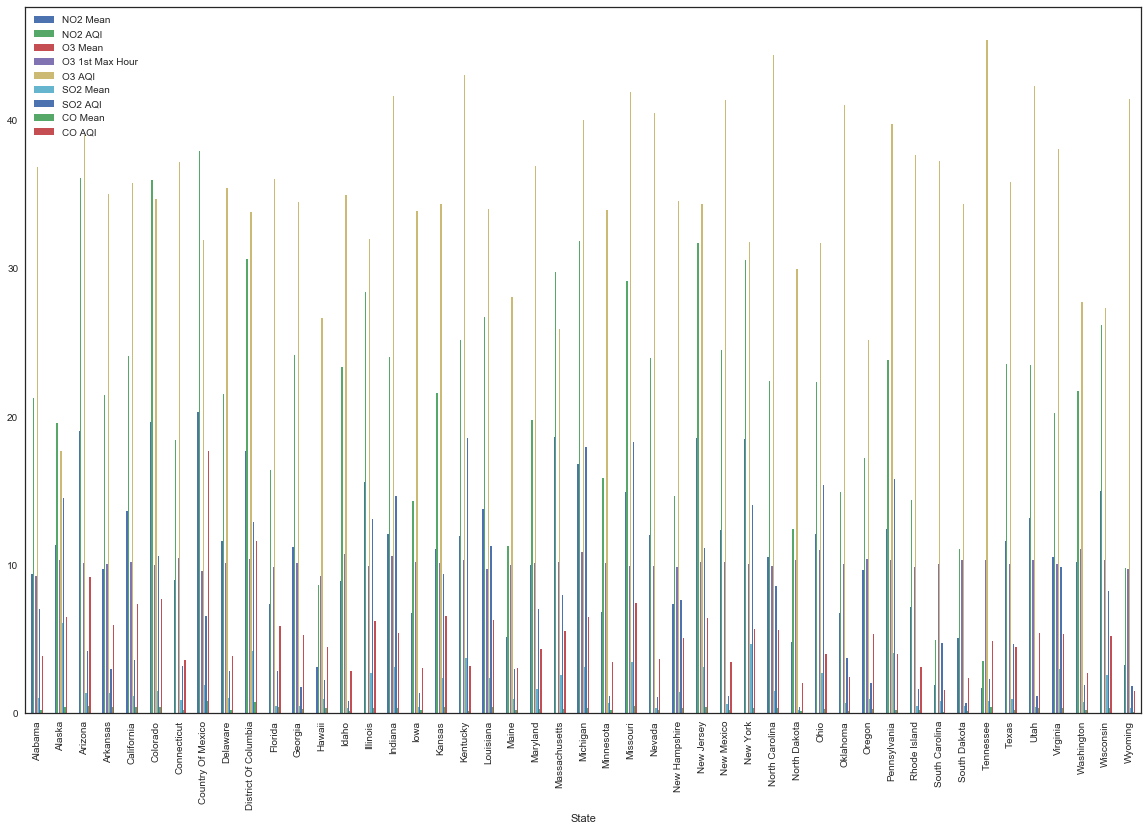

In [21]:
#This shows the total mean data grouped by state
data.groupby('State').mean().plot(kind = 'bar', figsize = (20, 13))
plt.show()

In [43]:
#create a scatterplot in bokeh
from bokeh.charts import Scatter, output_file, show

p = Scatter(data, x='State', y='SO2 AQI', color='blue', title="SO2 AQI by State",
            xlabel="State", ylabel="SO2 AQI",height=1000, width=1000)

output_file("pollution.html")

show(p)

E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='de76522f-bc2e-4187-bf28-d8021ab956ce', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='3c75c545-8331-45a4-a2bc-f1a1215c3f62', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='383bad9e-716d-4524-9c91-47d6b58439c8', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='ec8c0c78-7fb2-4e9e-9825-b4603fab14d5', ...)
E-1010 (CDSVIEW_SOURCE_DOESNT_MATCH): CDSView used by Glyph renderer must have a source that matches the Glyph renderer's data source: GlyphRenderer(id='2704a198-ec56-4410-ab72-605106470d64', ...)
E-1010 (CDSVIEW

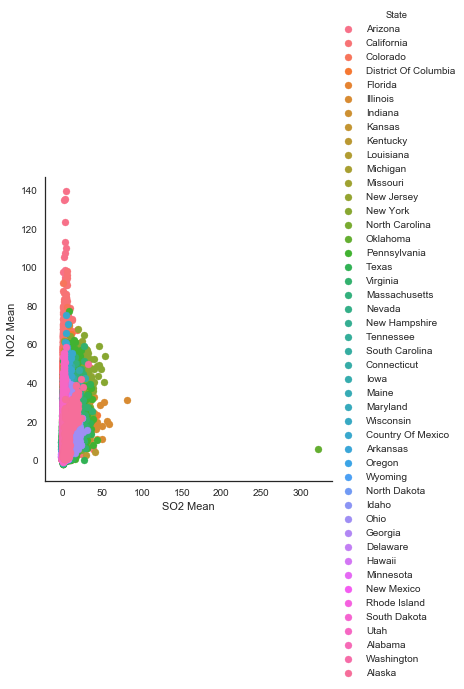

In [46]:

sns.FacetGrid(data, hue="State", size=5) \
   .map(plt.scatter, "SO2 Mean", "NO2 Mean") \
   .add_legend()
plt.show()